# Medical Insurance Price Prediction Using Machine Learning

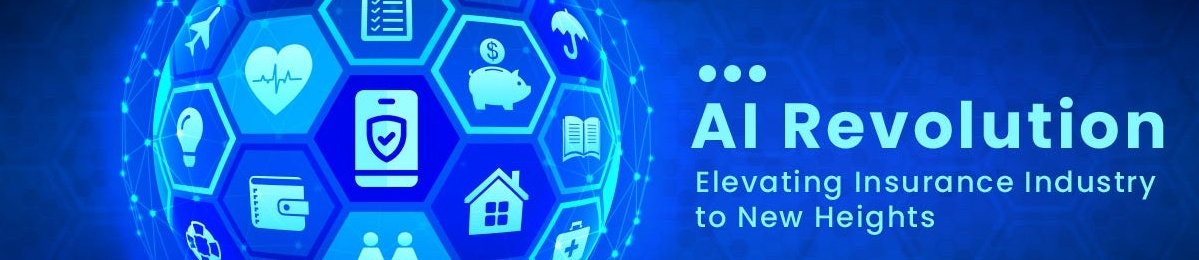

### Importing Libraries and Reading The Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("C:/Users/ashis/Downloads/Medical_Insurance_Price.csv")
df

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,Female,27.900,0,Yes,West,16884.92400
1,43,Male,33.770,1,No,East,1725.55230
2,28,Male,33.000,3,No,East,4449.46200
3,62,Male,22.705,0,No,South,21984.47061
4,46,Male,28.880,0,No,South,3866.85520
...,...,...,...,...,...,...,...
1333,25,Male,30.970,3,No,South,10600.54830
1334,26,Female,31.920,0,No,North,2205.98080
1335,34,Female,36.850,0,No,East,1629.83350
1336,35,Female,25.800,0,No,West,2007.94500


### Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,Age,BMI,Children,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,42.361734,30.663397,1.098655,13270.422265
std,11.064742,6.098187,1.204882,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,34.000000,26.296250,0.000000,4740.287150
50%,44.500000,30.400000,1.000000,9382.033000
75%,50.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

Age         0
Sex         0
BMI         0
Children    0
Smoker      0
Region      0
Charges     0
dtype: int64

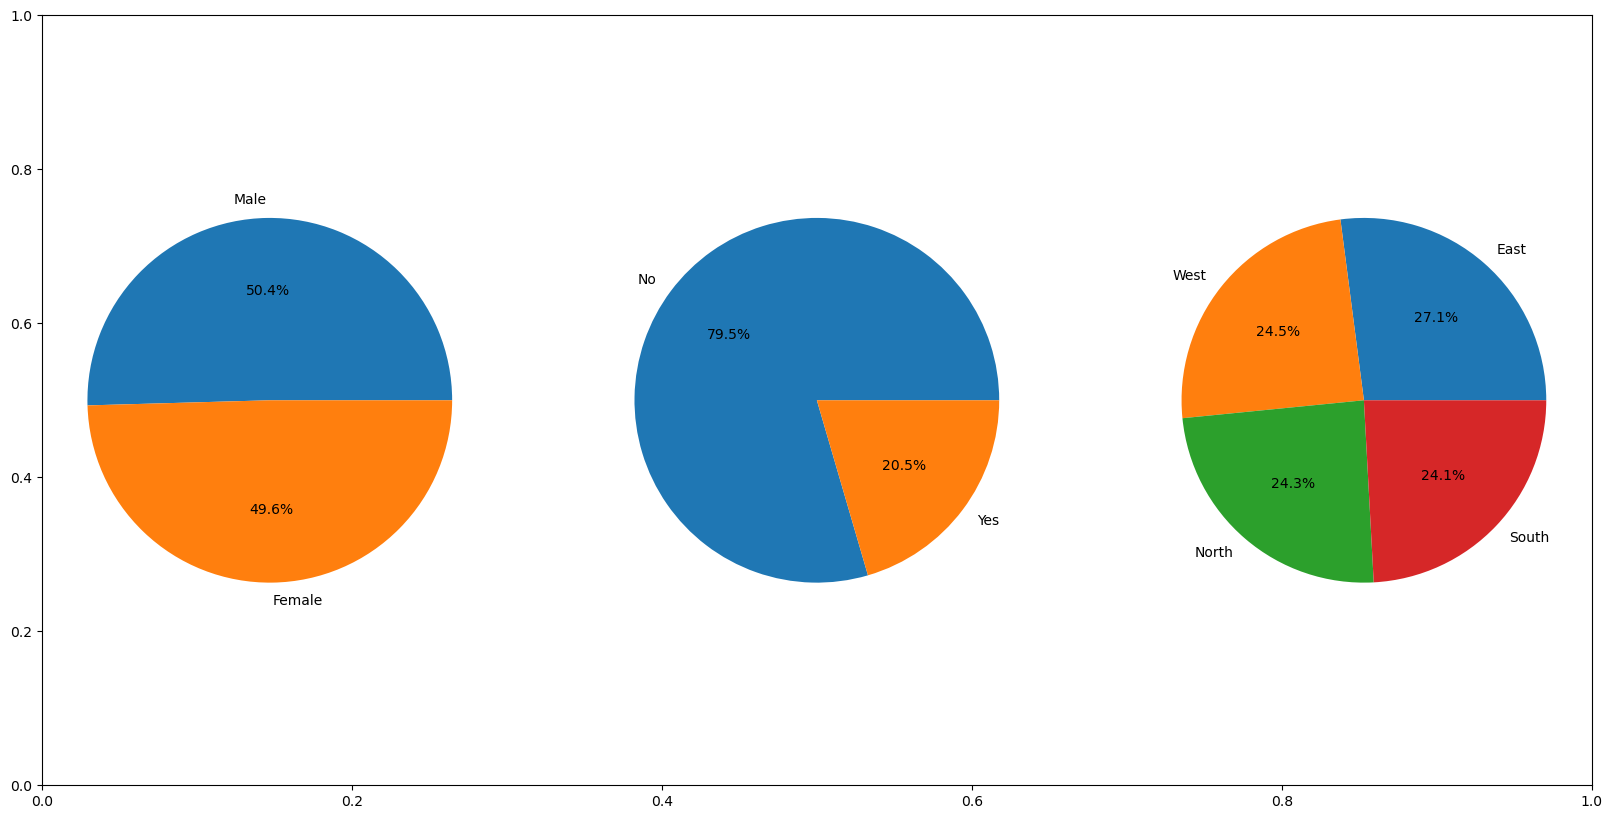

In [9]:
import matplotlib.pyplot as plt

features = ['Sex', 'Smoker', 'Region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()

<b> Pie chart for the Sex, Smoker and Region column :</b>

According to the data which is equally distributed among the Sex and the Region columns but in the Smoker column, we can observe a ratio of almost <b>80:20</b>.

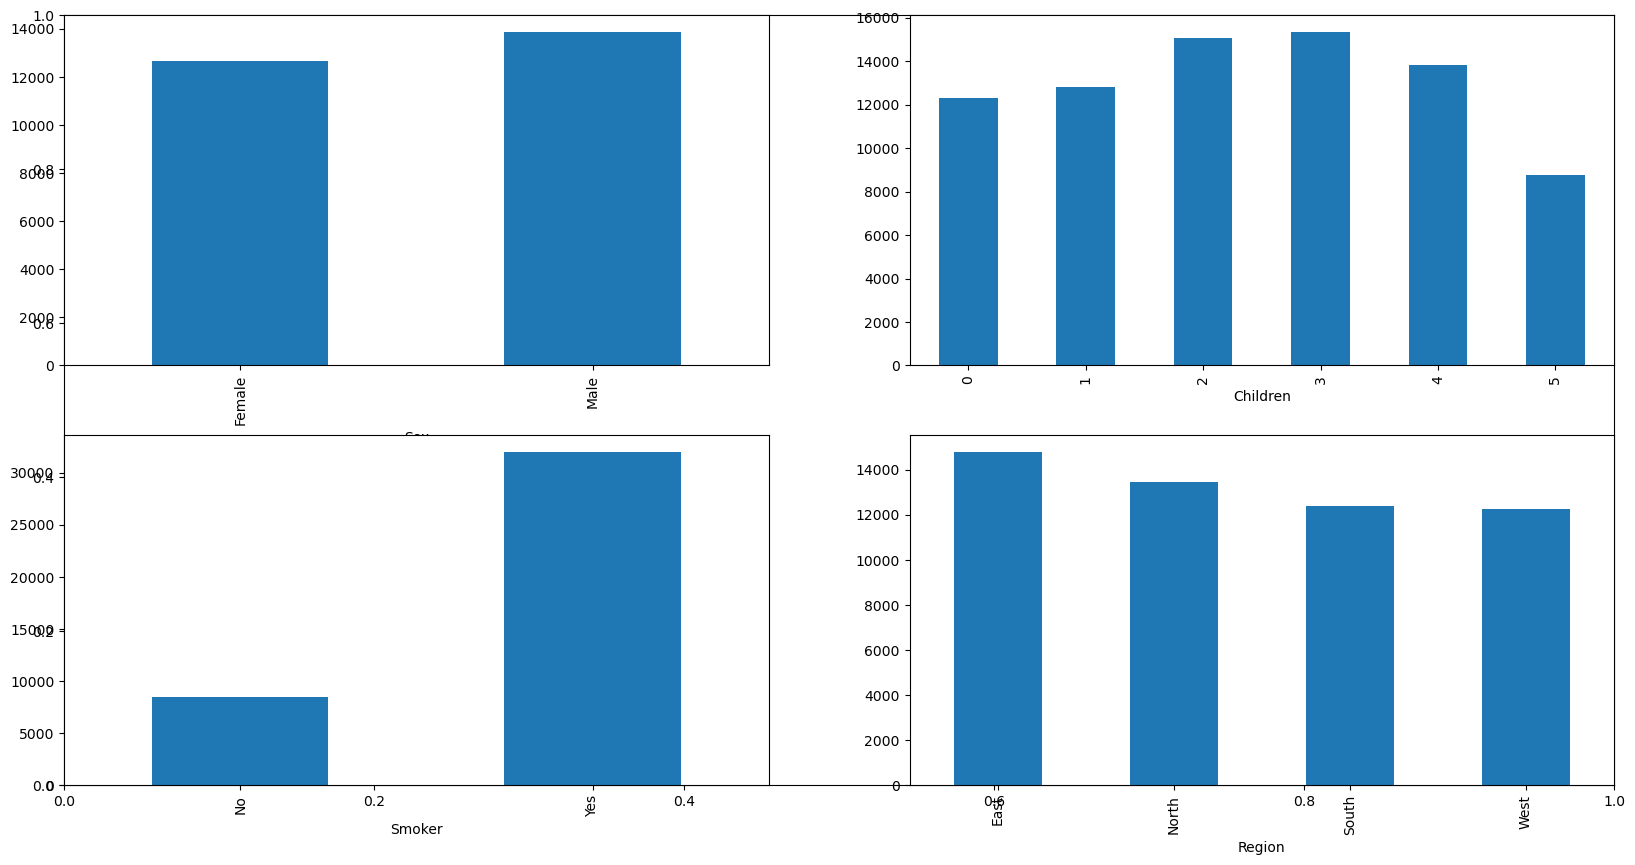

In [11]:
features = ['Sex', 'Children', 'Smoker', 'Region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['Charges'].mean().astype(float).plot.bar()
plt.show()

<b> The following are some conclusions that can be drawn from the graphs above : </b>

- Charges are on the approximately equal for both Males and Females.
- The premium imposed on Smokers is thrice than that for non-smokers.
- Charges are nearly uniform across the four specified Regions.

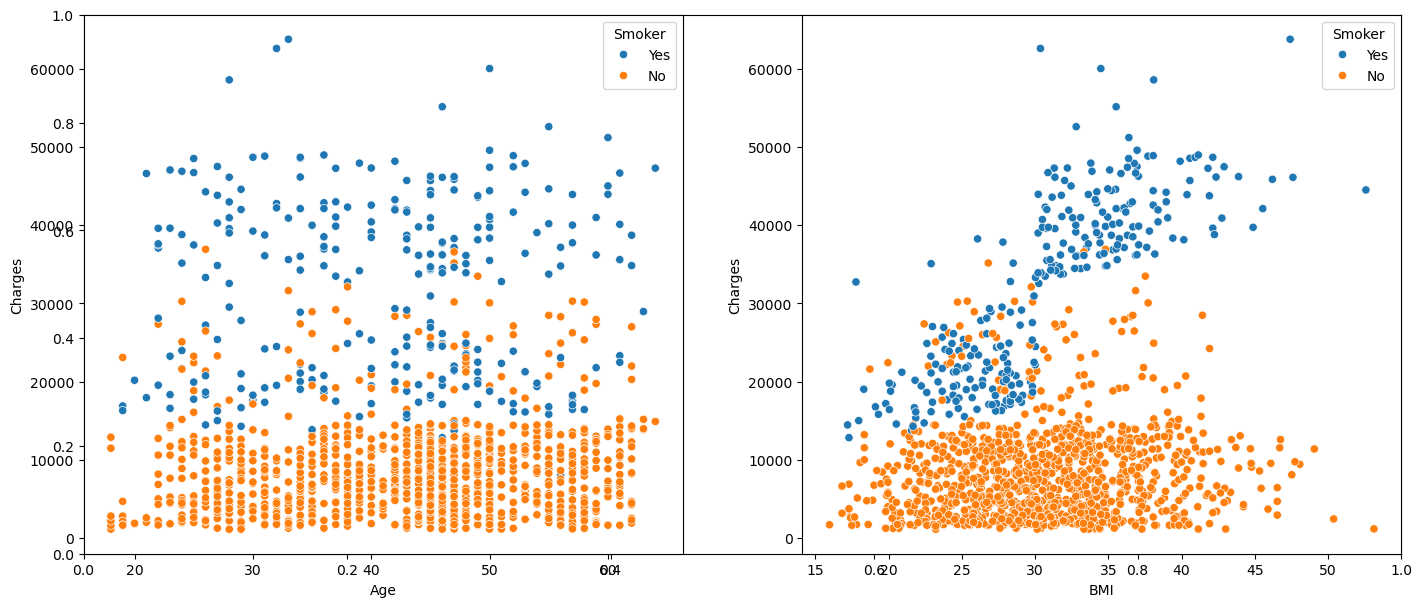

In [13]:
import seaborn as sns
features = ['Age', 'BMI']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col,
				y='Charges',
				hue='Smoker')
plt.show()

The charges that smokers are required to pay are clearly separated here. We can also see here that premium prices increase with age.

### Data Preprocessing

<Axes: ylabel='Age'>

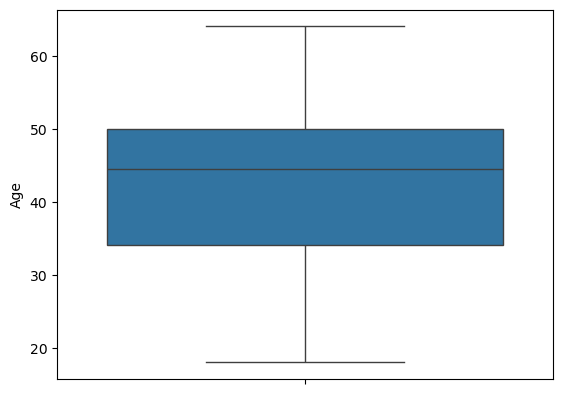

In [16]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['Age'])

we can see that there are no outliers present in Age column.

<Axes: ylabel='BMI'>

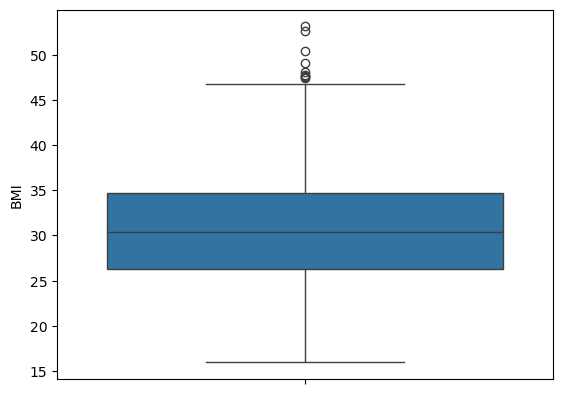

In [18]:
sns.boxplot(df['BMI'])

Due to the existence of outliers in the BMI column, it is necessary to address these outliers by substituting their values with the mean, as the BMI column contains continuous data.

In [20]:
Q1=df['BMI'].quantile(0.25)
Q2=df['BMI'].quantile(0.5)
Q3=df['BMI'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.7
47.290000000000006


<Axes: ylabel='BMI'>

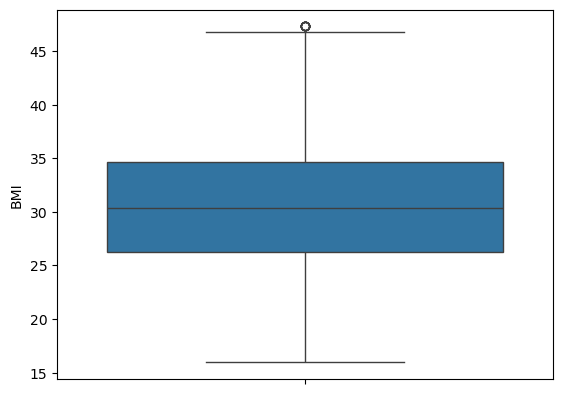

In [21]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'BMI':13.6749},max_capping_dict={'BMI':47.315})
df[['BMI']]=arb.fit_transform(df[['BMI']])
sns.boxplot(df['BMI'])

The outliers are treated successfully.

### Data Wrangling

In [24]:
print(df['BMI'].skew())
print(df['Age'].skew())

0.23300072331779548
-0.20861591461917553


Data in both the Age and BMI column nearly follow a Normal distribution which is a good point w.r.t the model's learning.

#### Encoding

In [27]:
df['Sex']=df['Sex'].map({'Male':0,'Female':1})
df['Smoker']=df['Smoker'].map({'Yes':1,'No':0})
df['Region']=df['Region'].map({'South':0, 'North':1,'East':2,'West':3})

In [28]:
df.corr()

,Age,Sex,BMI,Children,Smoker,Region,Charges
Age,1.000000,-0.014032,0.034953,-0.014909,-0.062309,0.014152,0.000241
Sex,-0.014032,1.000000,-0.044646,-0.019123,-0.065830,-0.007278,-0.049569
BMI,0.034953,-0.044646,1.000000,0.016457,0.005596,0.154595,0.199002
Children,-0.014909,-0.019123,0.016457,1.000000,0.006103,-0.008735,0.069760
Smoker,-0.062309,-0.065830,0.005596,0.006103,1.000000,0.014531,0.784177
Region,0.014152,-0.007278,0.154595,-0.008735,0.014531,1.000000,0.010036
Charges,0.000241,-0.049569,0.199002,0.069760,0.784177,0.010036,1.000000


### Model Development

In [30]:
X=df.drop(['Charges'],axis=1)
Y=df[['Charges']]
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
 lrmodel=LinearRegression()
 lrmodel.fit(xtrain,ytrain)
 l1.append(lrmodel.score(xtrain,ytrain))
 l2.append(lrmodel.score(xtest,ytest))
 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
 l3.append(cvs)
 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
 df1

##### Scores for various random_state number

In [32]:
print(df1)

   train acc  test acc       cvs
0   0.662813  0.646124  0.656789
1   0.674361  0.571324  0.656789
2   0.648504  0.698636  0.656789
3   0.673010  0.599896  0.656789
4   0.661935  0.646609  0.656789
5   0.672214  0.595564  0.656789
6   0.659996  0.652537  0.656789
7   0.641268  0.727957  0.656789
8   0.659525  0.653411  0.656789
9   0.660579  0.654908  0.656789


Following the partitioning of the data into training and validation sets, it is deemed a more effective approach to ensure stable and rapid model training. We have determined that the optimal random_state value for this dataset is 42. We will now set this random_state and experiment with various machine learning algorithms to enhance the score or accuracy.

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print("Linear Regression :")
print("Train Accuracy :", lrmodel.score(xtrain,ytrain))
print("Test Accuracy :", lrmodel.score(xtest,ytest))
print("CV Score :", cross_val_score(lrmodel,X,Y,cv=5,).mean())

Linear Regression :
Train Accuracy : 0.6485040353609186
Test Accuracy : 0.6986361860221595
CV Score : 0.6567892670567943


In [35]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print("Support Vector Machine :")
print("Train Accuracy :", r2_score(ytrain,ypredtrain1))
print("Test Accuracy :", r2_score(ytest,ypredtest1))
print("CV Score :", cross_val_score(svrmodel,X,Y,cv=5,).mean())

Support Vector Machine :
Train Accuracy : -0.09845518426956335
Test Accuracy : -0.07408245750088627
CV Score : -0.10481025619254632


In [36]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print("Random Forest Regressor :")
print("Train Accuracy :", r2_score(ytrain,ypredtrain2))
print("Test Accuracy :", r2_score(ytest,ypredtest2))
print("CV Score :", cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain,ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

Random Forest Regressor :
Train Accuracy : 0.9591943370589447
Test Accuracy : 0.7505538087345283
CV Score : 0.7347608142103982
{'n_estimators': 120}
0.9590109218968004
0.7521270682588646
0.7351928501115746


In [37]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print("Gradient Boosting Regressor :")
print("Train Accuracy :", r2_score(ytrain,ypredtrain3))
print("Test Accuracy :", r2_score(ytest,ypredtest3))
print("CV Score :", cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

Gradient Boosting Regressor :
Train Accuracy : 0.8191078602800166
Test Accuracy : 0.7852560432223544
CV Score : 0.7563448155930619
{'learning_rate': 0.19, 'n_estimators': 20}
0.7909195758344965
0.7872380145531327
0.7614633515707123


In [38]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print("XGB Regressor :")
print("Train Accuracy :", r2_score(ytrain,ypredtrain4))
print("Test Accuracy :", r2_score(ytest,ypredtest4))
print("CV Score :", cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

XGB Regressor :
Train Accuracy : 0.9859563486833176
Test Accuracy : 0.7108206906892229
CV Score : 0.6687850516281054
{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}
0.7884730333383712
0.7841593355174415
0.7623107996868012


### Comparing All Models

<table style="width:80%">
    <tr>
        <th><pr><span>Model</span></pr></th>
        <th><pr><span>Train Accuracy</span></pr></th>
        <th><pr><span>Test Accuracy</span></pr></th>
        <th><pr><span>CV Score</span></pr></th>
    </tr>
    <tr>
        <td>Linear Regression</td>
        <td>0.648</td>
        <td>0.698</td>
        <td>0.656</td>
    </tr>
    <tr>
        <td>Support Vector Machine</td>
        <td>-0.098</td>
        <td>-0.074</td>
        <td>-0.104</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>0.959</td>
        <td>0.750</td>
        <td>0.734</td>
    </tr>  
	<tr>
        <td>Gradient Boost</td>
        <td>0.819</td>
        <td>0.785</td>
        <td>0.756</td>
    </tr>
	<tr>
        <td>XG Boost</td>
        <td>0.985</td>
        <td>0.710</td>
        <td>0.668</td>
    </tr>

<b>It is now essential to determine the key features for predicting Charges.</b>

In [42]:
feats=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
Age,0.006407
Sex,0.007222
BMI,0.068954
Children,0.007443
Smoker,0.904672
Region,0.005301


In [43]:
important_features=feats[feats['Importance']>0.01]
important_features

,Importance
BMI,0.068954
Smoker,0.904672


### Final Model

In [45]:
df.drop(df[['Sex','Region']],axis=1,inplace=True)
Xf=df.drop(df[['Charges']],axis=1)
X=df.drop(df[['Charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print("Train Accuracy :", r2_score(ytrain,ypredtrain4))
print("Test Accuracy :", r2_score(ytest,ypredtest4))
print("CV Score :", cross_val_score(finalmodel,X,Y,cv=5,).mean())

Train Accuracy : 0.7842530366533099
Test Accuracy : 0.7888173885424368
CV Score : 0.7629462962456766


### Save Model

In [47]:
from pickle import dump
dump(finalmodel,open('medicalinsurancepricemodelf.pkl','wb'))

In [48]:
new_data=pd.DataFrame({'Age':19,'Sex':'Male','BMI':27.9,'Children':0,'Smoker':'Yes','Region':'North'},index=[0])
new_data['Smoker']=new_data['Smoker'].map({'Yes':1,'No':0})
new_data=new_data.drop(new_data[['Sex','Region']],axis=1)
finalmodel.predict(new_data)

array([20417.719], dtype=float32)